# Bank Marketing
This dataset consists of direct marketing campaigns by a Portuguese banking institution using phone calls. The campaigns aimed to sell subscriptions to a bank term deposit (see variable `y`). 

Not sure where to begin? Scroll to the bottom to find challenges!

## Data Dictionary
| Column | Variable | Class |
| --- | --------------- | --- |
| age | age of customer | |
| job | type of job | categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown" |
| marital | marital status | categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed |
| education | highest degree of customer | categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown" |
| default | has credit in default? | categorical: "no","yes","unknown" |
| housing | has housing loan? | categorical: "no","yes","unknown" |
| loan | has personal loan? | categorical: "no","yes","unknown" |
| contact | contact communication type | categorical: "cellular","telephone" |
| month | last contact month of year | categorical: "jan", "feb", "mar", ..., "nov", "dec" | 
| day_of_week | last contact day of the week | categorical: "mon","tue","wed","thu","fri" |
| campaign | number of contacts performed during this campaign and for this client | numeric, includes last contact |
| pdays | number of days that passed by after the client was last contacted from a previous campaign | numeric; 999 means client was not previously contacted |
| previous | number of contacts performed before this campaign and for this client | numeric |
| poutcome | outcome of the previous marketing campaign | categorical: "failure","nonexistent","success" |
| emp.var.rate | employment variation rate - quarterly indicator | numeric |
| cons.price.idx | consumer price index - monthly indicator | numeric   | 
| cons.conf.idx | consumer confidence index - monthly indicator | numeric |   
| euribor3m | euribor 3 month rate - daily indicator | numeric |
| nr.employed | number of employees - quarterly indicator | numeric |
| y | has the client subscribed a term deposit? | binary: "yes","no" |

[Source](https://archive.ics.uci.edu/ml/datasets/bank+marketing) of dataset. 

**Citations**:  
- S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014
- S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October, 2011. EUROSIS. 

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: What are the jobs of the people most likely to subscribe to a term deposit?
- 📊 **Visualize**: Create a plot to visualize the number of people subscribing to a term deposit by `month`.
- 🔎 **Analyze**: What impact does the number of contacts performed during the last campaign have on the likelihood that a customer subscribes to a term deposit?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You work for a financial services firm. The past few campaigns have not gone as well as the firm would have hoped, and they are looking for ways to optimize their marketing efforts.

They have supplied you with data from a previous campaign and some additional metrics such as the consumer price index and consumer confidence index. They want to know whether you can predict the likelihood of subscribing to a term deposit. The manager would also like to know what factors are most likely to increase a customer's probability of subscribing.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

## Load and check data

In [1]:
import pandas as pd
data = pd.read_csv("bank-marketing.csv", sep=";")

In [2]:
data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

**Check the null data**

In [4]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# 🗺️ Explore: What are the jobs of the people most likely to subscribe to a term deposit?

## **Analysis Job Distribution**

In [2]:
total_job_dep = data.job.value_counts()
total_job_dep

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

## visualization job distribution of Subscribiton users in chart

Text(0.5, 1.0, 'Subscription customer job distribution')

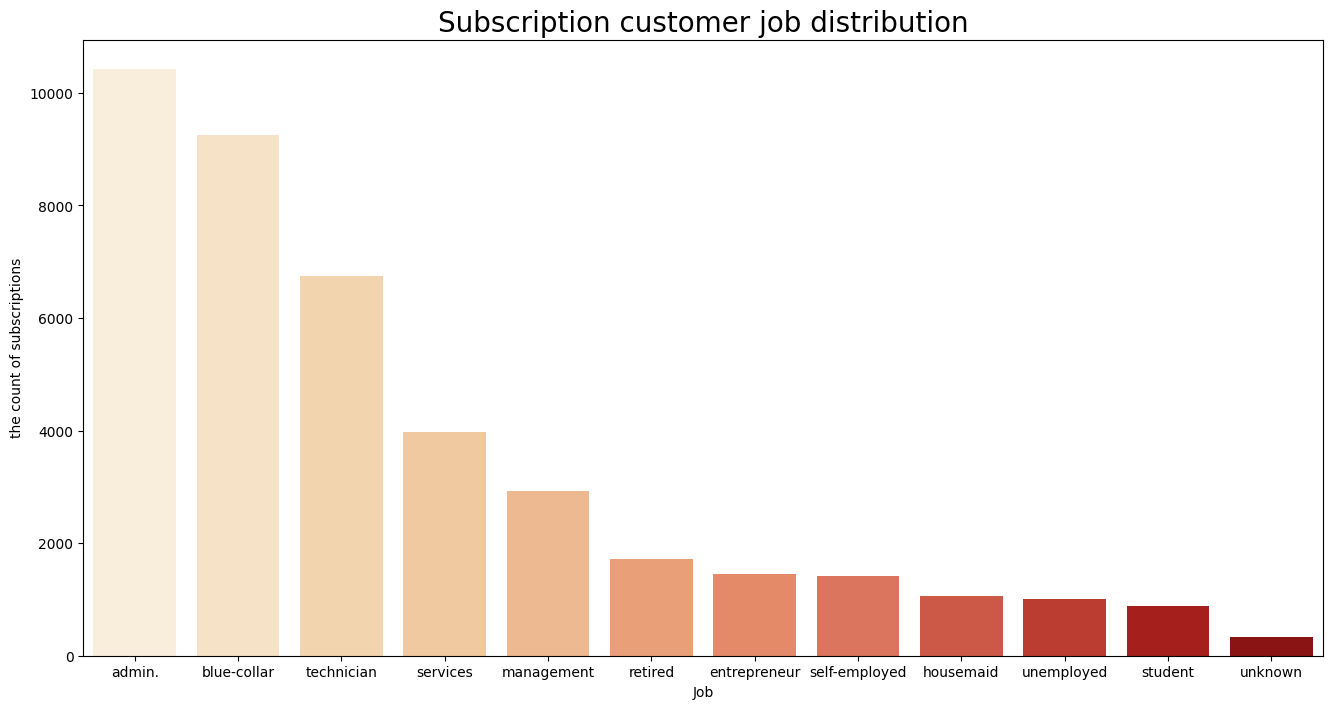

In [37]:
fig, ax = plt.subplots(figsize=(16,8))
job_count_bar = sns.countplot(x='job',data=data, palette='OrRd',order=data.job.value_counts().index)
plt.xlabel('Job')
plt.ylabel('the count of subscriptions')
plt.title('Subscription customer job distribution',fontsize=20)

## Analsyis the probability of jobs ditribution

In [5]:
order_data = data[data['y']=='yes']
ordered_job_dep = order_data.job.value_counts()
prob = (ordered_job_dep/total_job_dep*100).round(2).sort_values(ascending=False)
prob

student          31.43
retired          25.23
unemployed       14.20
admin.           12.97
management       11.22
unknown          11.21
technician       10.83
self-employed    10.49
housemaid        10.00
entrepreneur      8.52
services          8.14
blue-collar       6.89
Name: job, dtype: float64

## visualztion job distribution

Text(0.5, 1.0, 'Distribution of customer job')

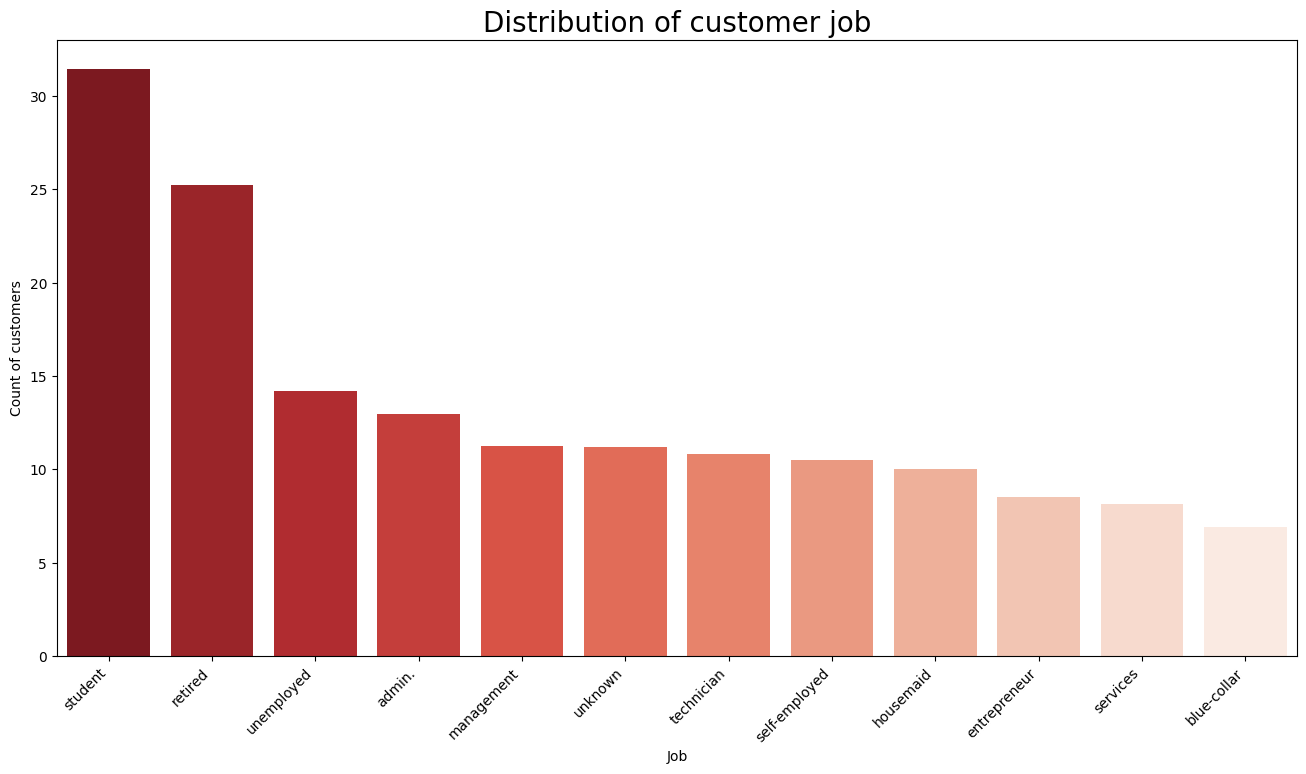

In [36]:
fig, ax = plt.subplots(figsize=(16,8))
job_contribution = sns.barplot(x=prob.index, y=prob.values, palette='Reds_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Job')
plt.ylabel('Count of customers')
plt.title('Distribution of customer job',fontsize=20)

# 📊 Visualize: Create a plot to visualize the number of people subscribing to a term deposit by month

## Analysis  month and Subscription  

In [7]:
month_order_data = pd.DataFrame()
month_order_data = order_data.groupby('month').size().reset_index(name='Subscribe_num')

In [70]:
month_order_data

,month,Subscribe_num
0,apr,539
1,aug,655
2,dec,89
3,jul,649
4,jun,559
5,mar,276
6,may,886
7,nov,416
8,oct,315
9,sep,256


In [8]:
month_order = ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

## Visualisation month Distribution 

Text(0.5, 1.0, 'Subscription count in different month')

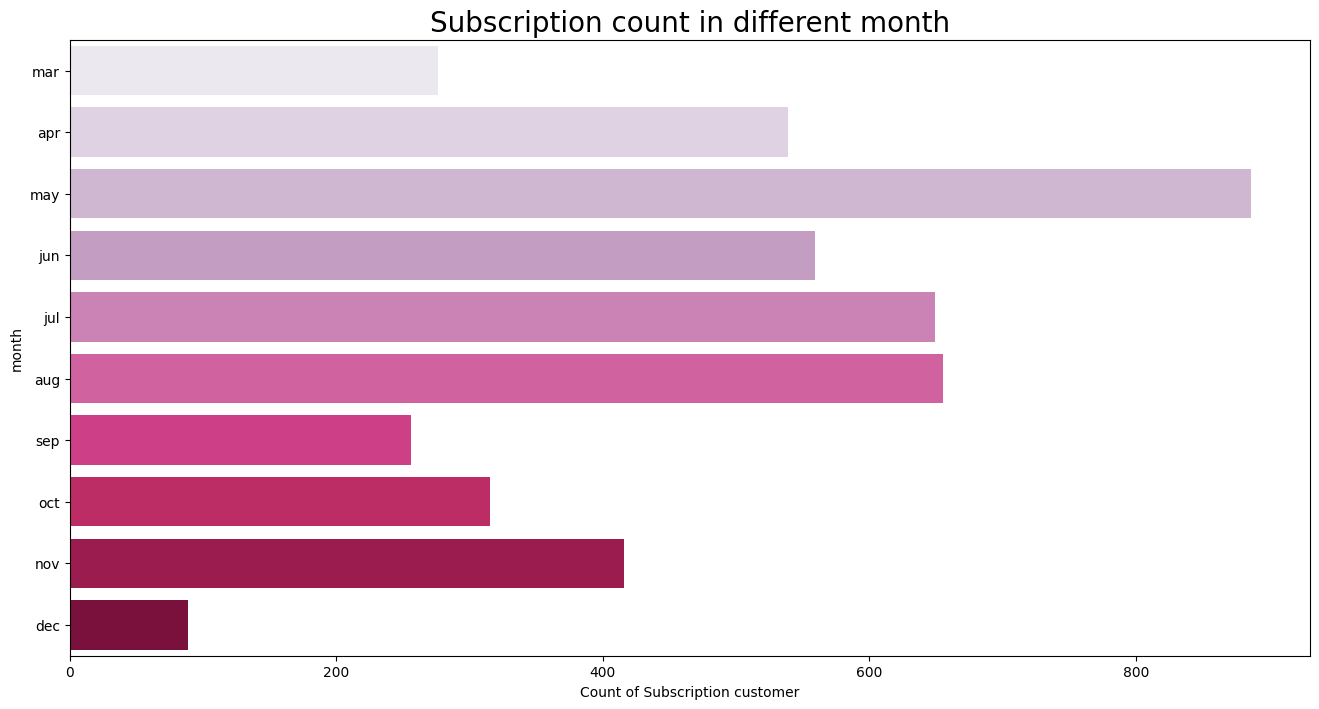

In [35]:

month_plt = plt.figure(figsize=(16,8))
month_bar = sns.barplot(x=month_order_data['Subscribe_num'], y=month_order_data['month'], palette='PuRd', orient='h',order=month_order)
plt.xlabel('Count of Subscription customer')
plt.title('Subscription count in different month',fontsize=20)

# 💡More Explore:

## Analysis the distribution of age on Subscription 

In [5]:
data['age'].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89])

Text(0.5, 1.0, 'The distribution of Customer age')

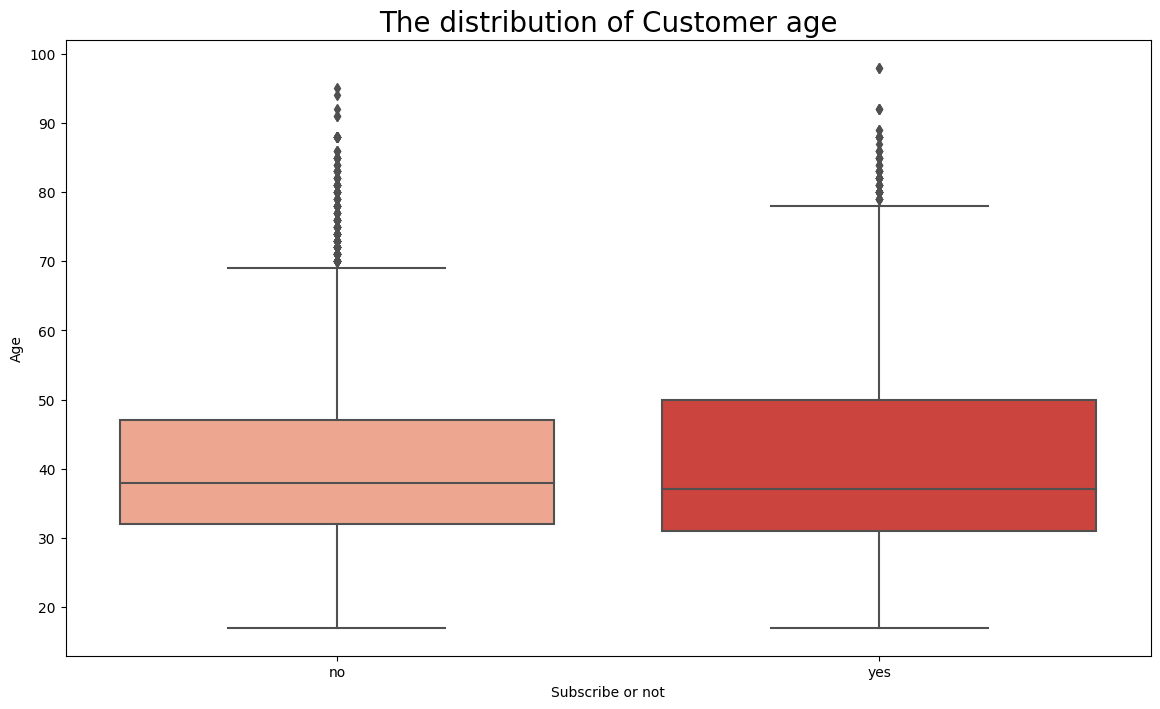

In [34]:
fig = plt.figure(figsize=(14,8))
sns.boxplot(x=data['y'], y=data['age'],data=data, palette='Reds')
plt.ylabel('Age')
plt.xlabel('Subscribe or not')
plt.title('The distribution of Customer age',fontsize=20)

## Analysis marital Occupation in subscription or not subscription customers.

In [11]:
no_order_data = data[data['y']=='no']

In [16]:
order_size = order_data['marital'].value_counts()
no_order_sise = no_order_data['marital'].value_counts()

In [61]:
labels=['married', 'single','divorced', 'unknown']
colors = ['lightcoral', 'tomato','salmon', 'lightsalmon','darkslmon']
colors1 = ['mediumorchid','thistle','plum', 'orchid','lightorchid']

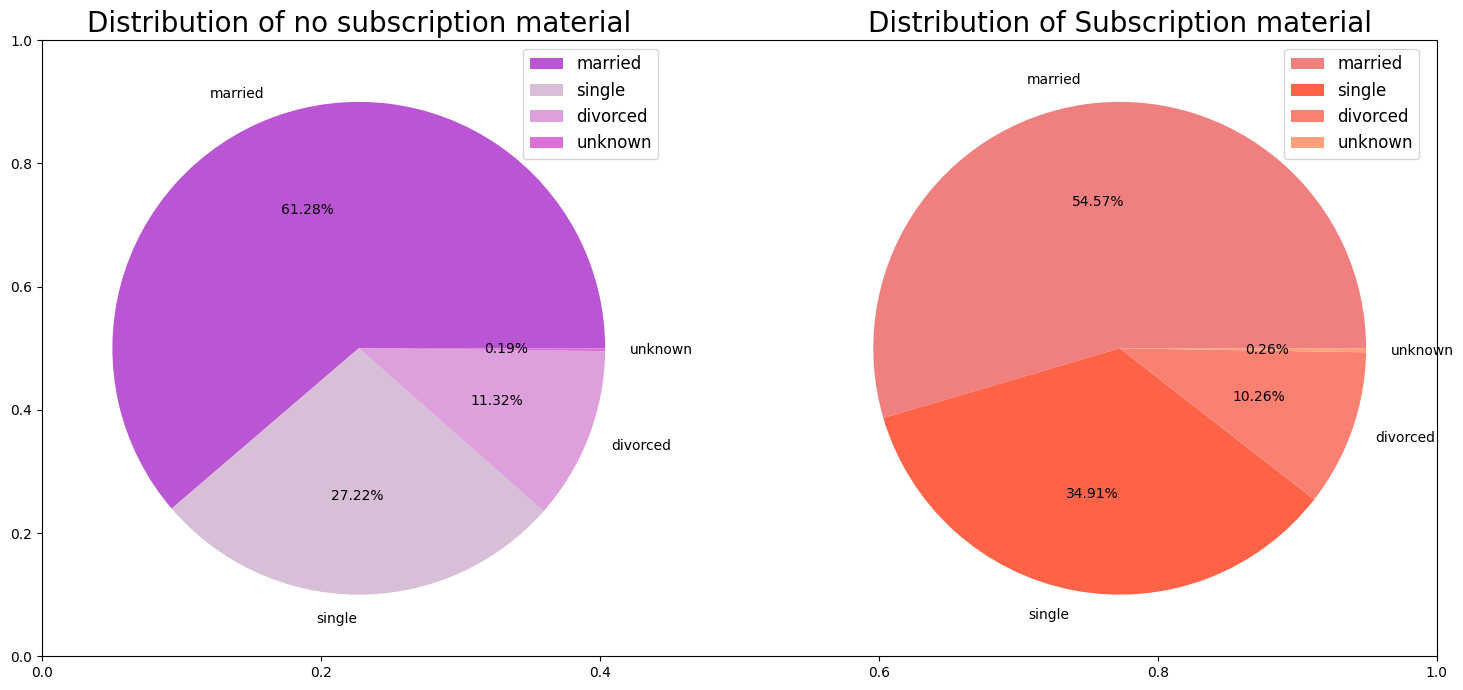

In [62]:
fig, axs = plt.subplots(figsize=(18,8))
ax1=fig.add_subplot(121)
ax1.pie(no_order_sise, labels=labels, colors=colors1, autopct='%.2f%%')
ax1.set_title('Distribution of no subscription material',fontsize=20)
ax1.legend(fontsize=12)
ax2=fig.add_subplot(122)
ax2.pie(order_size, labels=labels, colors=colors, autopct='%.2f%%')
ax2.set_title('Distribution of Subscription material',fontsize=20)
ax2.legend(fontsize=12)

## Analsyis education and Subscription relationship

In [75]:
data.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

Text(0, 0.5, 'Num of customer')

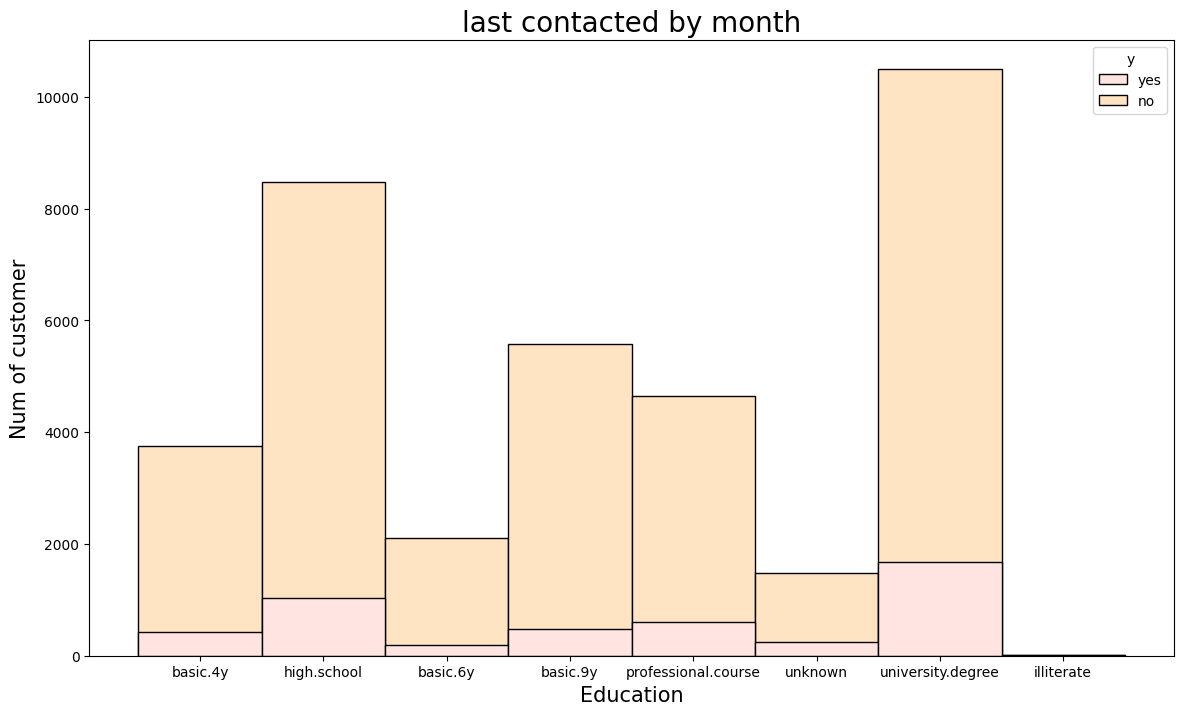

In [91]:
fig = plt.figure(figsize=(14,8))
sns.histplot(x = "education", hue = "y", hue_order = ("yes","no"), palette = ("mistyrose", "bisque"),alpha = 1,data = data)
plt.title("last contacted by month",fontsize=20)
plt.xlabel('Education',fontsize=15)
plt.ylabel('Num of customer',fontsize=15)

# 🔎 Analyze: What impact does the number of contacts performed during the last campaign have on the likelihood that a customer subscribes to a term deposit?

In [86]:
total_contact_data = data.previous.value_counts()
contact_data = order_data.previous.value_counts()
contact_prob = (contact_data/total_contact_data*100).round(2)
contact_prob

0     8.83
1    21.20
2    46.42
3    59.26
4    54.29
5    72.22
6    60.00
7      NaN
Name: previous, dtype: float64

## Visualization the relationship between subscriptions and previous contacts performed 

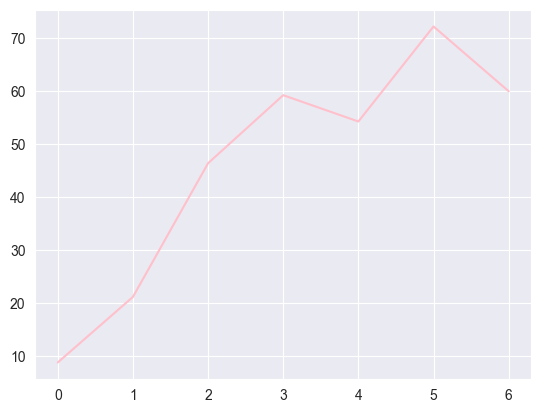

In [104]:
sns.set_style("darkgrid")
previous_prob_chart = sns.lineplot(x=contact_prob.index, y=contact_prob.values,color='pink', )

## Analysis subscripte and contract times relationship

**According to the digram, we found more contract means higher subscription probability. 
When have 3 contracts, it has light effect on subscription.
Especially when having 5 times contact, customer more willing to try have subscriptions.**

# 📈Classification: build model to distinguish Subscription or not

**In this part, Using Decision Tree to classification, 70% dataset as trainging data, and 30% as test data.
Using supervised classification model.**

In [6]:
data.shape

(41188, 21)

In [2]:
model_data = data[["age", "job", "marital", "education", "housing", "loan", "y"]]
model_data

,age,job,marital,education,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,no,no,no
2,37,services,married,high.school,yes,no,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,yes,no
...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,yes
41184,46,blue-collar,married,professional.course,no,no,no
41185,56,retired,married,university.degree,yes,no,no
41186,44,technician,married,professional.course,no,no,yes


select same count data of subscriptions 

In [3]:
transfer_y = {'y':{'yes':1, 'no':0}}
model_data = model_data.replace(transfer_y)
model_data

,age,job,marital,education,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,0
1,57,services,married,high.school,no,no,0
2,37,services,married,high.school,yes,no,0
3,40,admin.,married,basic.6y,no,no,0
4,56,services,married,high.school,no,yes,0
...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,1
41184,46,blue-collar,married,professional.course,no,no,0
41185,56,retired,married,university.degree,yes,no,0
41186,44,technician,married,professional.course,no,no,1


In [4]:
model_data_yes = model_data[model_data['y']==1]
model_data_no = model_data[model_data['y']==0]
model_data_no = model_data_no.sample(len(model_data_yes))
model_data = pd.concat([model_data_no,model_data_yes])

model_data

,age,job,marital,education,housing,loan,y
31250,46,services,married,high.school,yes,yes,0
2344,53,technician,married,professional.course,yes,yes,0
9888,45,blue-collar,married,basic.6y,yes,no,0
31593,32,admin.,married,high.school,yes,no,0
37924,60,retired,married,professional.course,yes,no,0
...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,yes,no,1
41178,62,retired,married,university.degree,no,no,1
41181,37,admin.,married,university.degree,yes,no,1
41183,73,retired,married,professional.course,yes,no,1


In [5]:
# Convert categorical variables
model_data = pd.get_dummies(model_data)
model_data

,age,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
31250,46,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2344,53,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
9888,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
31593,32,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
37924,60,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
41178,62,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
41181,37,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
41183,73,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**create training data and test data**

In [8]:
X = model_data.drop('y', axis=1)
y = model_data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

**set up model**

In [10]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train,y_train)
score = clf.score(X_train,y_train)
print(score)

0.8352832512315271


In [16]:
y_pred_t = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_t)
accuracy

0.5581896551724138